# Diabetes Dataset Expolatory Data Analysis

## Name: Srijan Sareen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Original Dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset/data
dataset = pd.read_csv(r'C:\Users\srija\Downloads\project_dataset\diabetes_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Stroke                70692 non-null  int64
 16  High

In [4]:
dataset.head()

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0   44    1         0          1   26       0                     0   
1   31    1         1          1   26       1                     0   
2   31    1         0          1   26       0                     0   
3   47    1         1          1   28       1                     0   
4   71    0         0          1   29       1                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             0       1        0                  0        3         0   
2             1       1        1                  0        1         0   
3             1       1        1                  0        3         0   
4             1       1        1                  0        2         0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0        30         0       0       1         0  
1         0         0       1       1         0  
2        10         0       0       0         0  
3         3         0       0       1         0  
4         0         0       0       0         0

In [5]:
duplicate_rows = dataset.duplicated().sum()
print(duplicate_rows)
print(dataset.shape)
print(max(dataset['Age']))

1644
(70692, 18)
80


In [6]:
dataset=dataset.drop_duplicates(subset=None,keep='first',inplace=False)
print(dataset.shape)

(69048, 18)


In [7]:
# dataset['Sex']=dataset['Sex'].replace({0:'F',1:'M'})
# dataset['HighChol']=dataset['HighChol'].replace({0:'N',1:'Y'})
# dataset['CholCheck']=dataset['CholCheck'].replace({0:'N',1:'Y'})
# dataset['Smoker']=dataset['Smoker'].replace({0:'N',1:'Y'})
dataset.head()

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0   44    1         0          1   26       0                     0   
1   31    1         1          1   26       1                     0   
2   31    1         0          1   26       0                     0   
3   47    1         1          1   28       1                     0   
4   71    0         0          1   29       1                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             0       1        0                  0        3         0   
2             1       1        1                  0        1         0   
3             1       1        1                  0        3         0   
4             1       1        1                  0        2         0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0        30         0       0       1         0  
1         0         0       1       1         0  
2        10         0       0       0         0  
3         3         0       0       1         0  
4         0         0       0       0         0

In [8]:
print(dataset.isna().sum())
print(dataset.shape)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
(69048, 18)


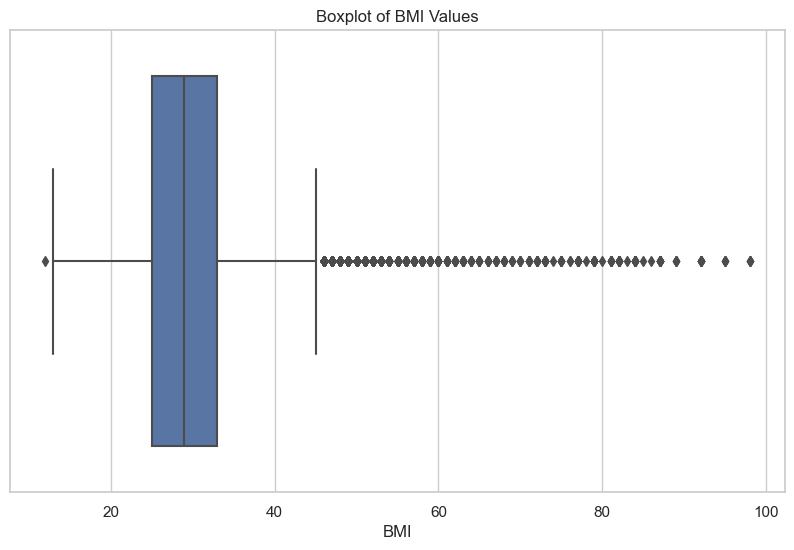

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['BMI'])
plt.title('Boxplot of BMI Values')
plt.xlabel('BMI')
plt.show()

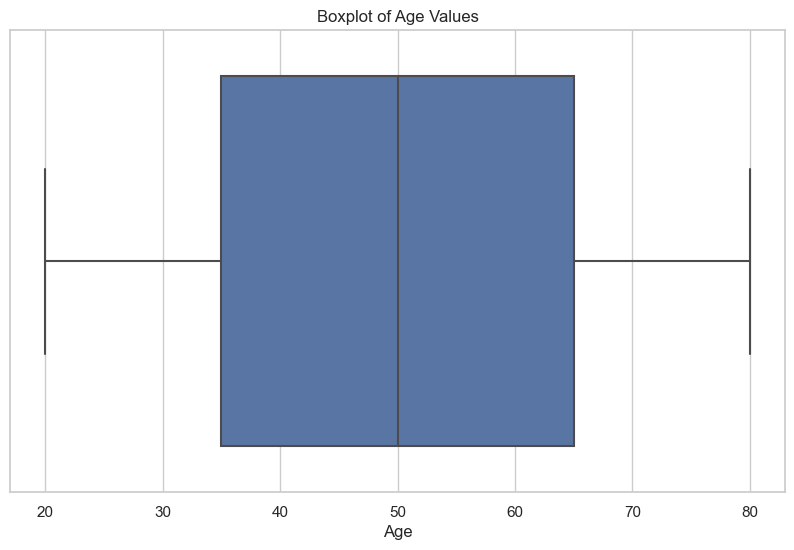

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Age'])
plt.title('Boxplot of Age Values')
plt.xlabel('Age')
plt.show()

This heatmap displays the correlation coefficients between diabetes and all other numerical variables in the dataset. Variables closer to 1 or -1 indicate a stronger positive or negative correlation with diabetes, respectively.

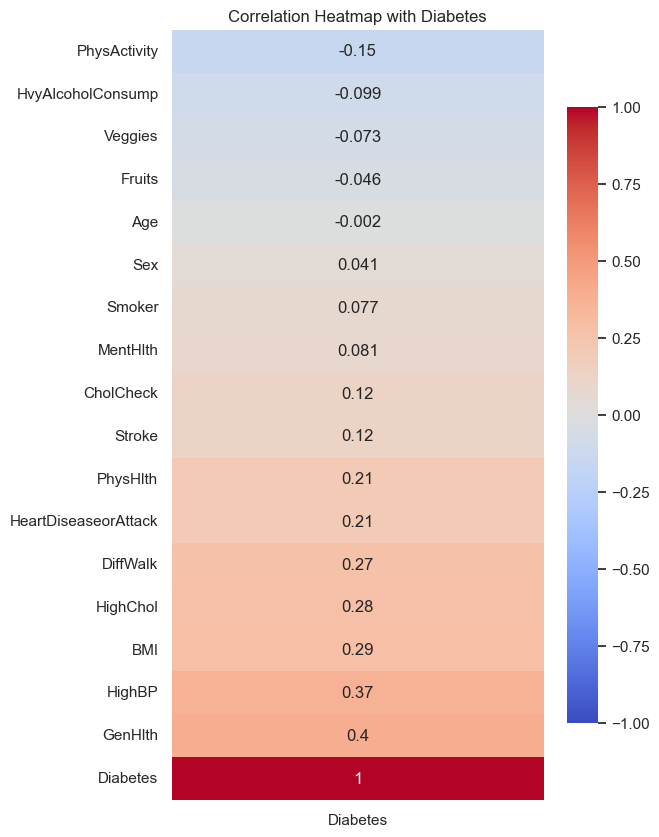

In [11]:
correlation_matrix_diabetes=dataset.corr()['Diabetes'].sort_values().to_frame()
plt.figure(figsize=(6,10))
sns.heatmap(correlation_matrix_diabetes,annot=True,cmap='coolwarm',vmin=-1,vmax=1,cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap with Diabetes')
plt.show()

These box plots provide insights into how BMI and age distributions differ between individuals with and without diabetes:

BMI: The median BMI for diabetic individuals appears higher compared to those without diabetes. This suggests a potential link between higher BMI and the prevalence of diabetes.
Age: The age distribution for diabetic individuals skews older compared to non-diabetics, indicating that diabetes prevalence increases with age.

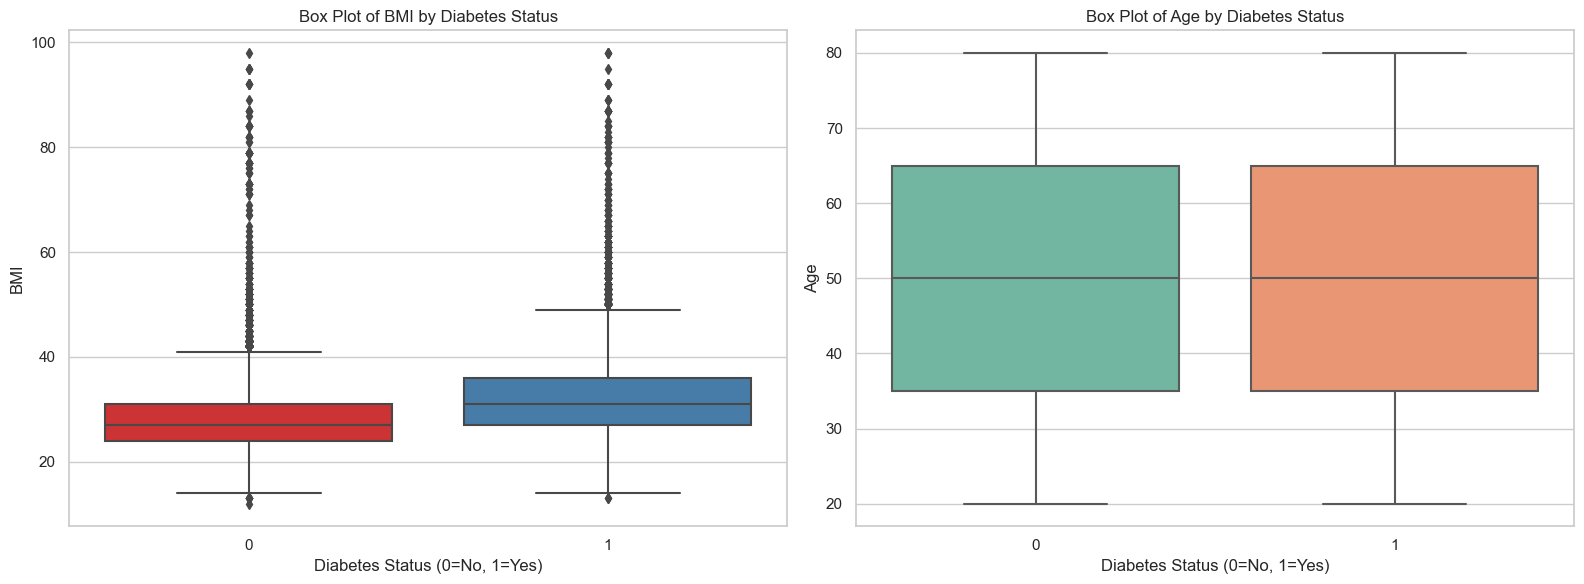

In [12]:
fig, axes=plt.subplots(1,2,figsize=(16, 6))

sns.boxplot(ax=axes[0],x='Diabetes',y='BMI',data=dataset,palette='Set1')
axes[0].set_title('Box Plot of BMI by Diabetes Status')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0].set_ylabel('BMI')

sns.boxplot(ax=axes[1], x='Diabetes',y='Age', data=dataset,palette='Set2')
axes[1].set_title('Box Plot of Age by Diabetes Status')
axes[1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

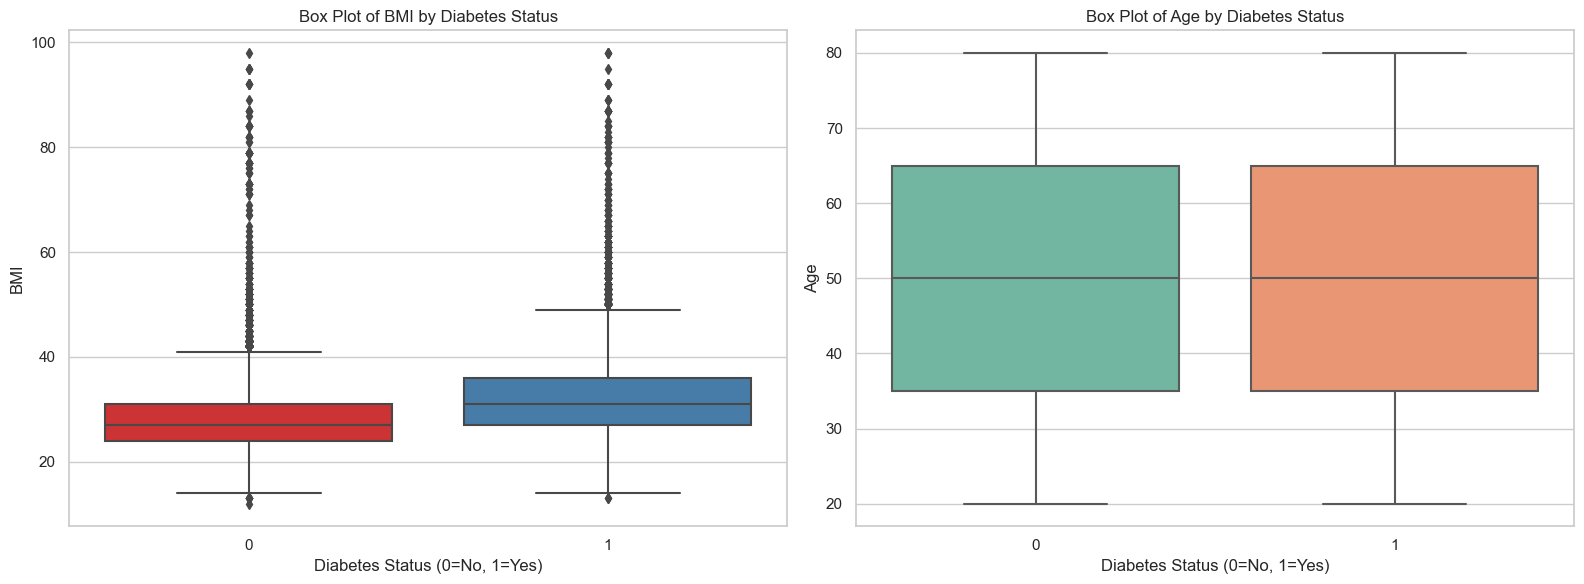

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0],x='Diabetes',y='BMI', data=dataset,palette='Set1')
axes[0].set_title('Box Plot of BMI by Diabetes Status')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0].set_ylabel('BMI')

sns.boxplot(ax=axes[1],x='Diabetes',y='Age',data=dataset,palette='Set2')
axes[1].set_title('Box Plot of Age by Diabetes Status')
axes[1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[1].set_ylabel('Age')
plt.tight_layout()
plt.show()

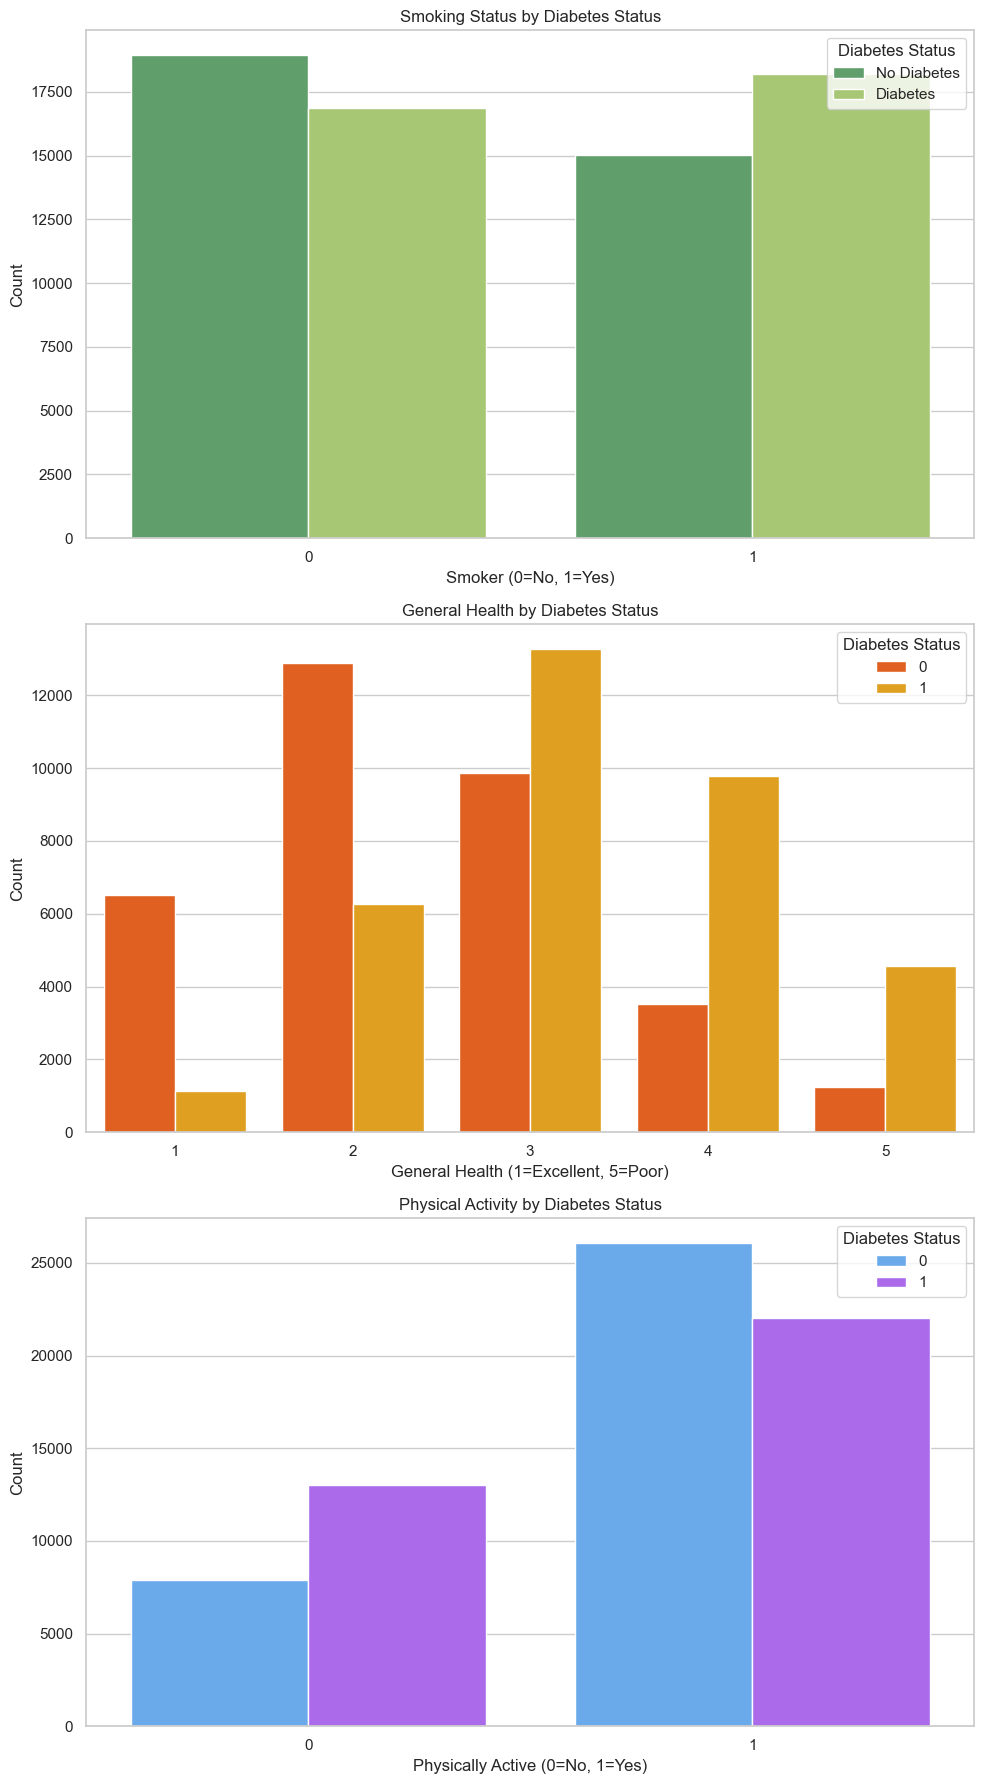

In [14]:
fig, axes =plt.subplots(3,1,figsize=(10, 18))

sns.countplot(ax=axes[0], x='Smoker',hue='Diabetes',data=dataset, palette='summer')
axes[0].set_title('Smoking Status by Diabetes Status')
axes[0].set_xlabel('Smoker (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Diabetes Status',labels=['No Diabetes', 'Diabetes'])

sns.countplot(ax=axes[1],x='GenHlth',hue='Diabetes',data=dataset, palette='autumn')
axes[1].set_title('General Health by Diabetes Status')
axes[1].set_xlabel('General Health (1=Excellent, 5=Poor)')
axes[1].set_ylabel('Count')
axes[1].legend(title='Diabetes Status')

sns.countplot(ax=axes[2],x='PhysActivity',hue='Diabetes',data=dataset,palette='cool')
axes[2].set_title('Physical Activity by Diabetes Status')
axes[2].set_xlabel('Physically Active (0=No, 1=Yes)')
axes[2].set_ylabel('Count')
axes[2].legend(title='Diabetes Status')

plt.tight_layout()
plt.show()

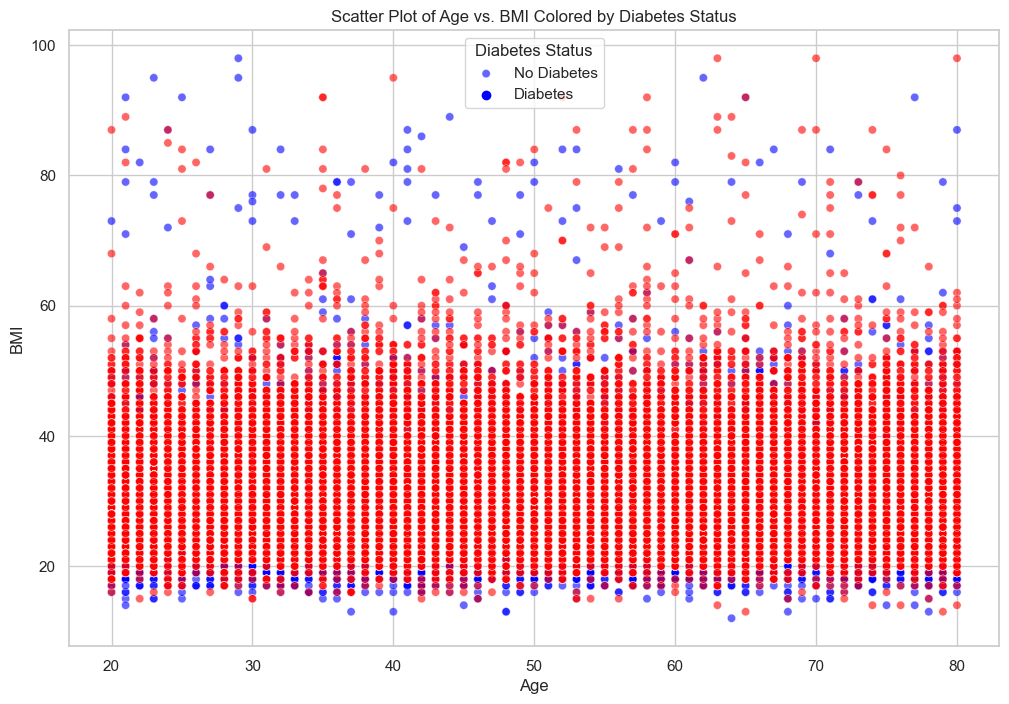

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset['Age'],y=dataset['BMI'],hue=dataset['Diabetes'],palette=['blue','red'],alpha=0.6)
plt.title('Scatter Plot of Age vs. BMI Colored by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes Status', labels=['No Diabetes','Diabetes'])
plt.grid(True)
plt.show()

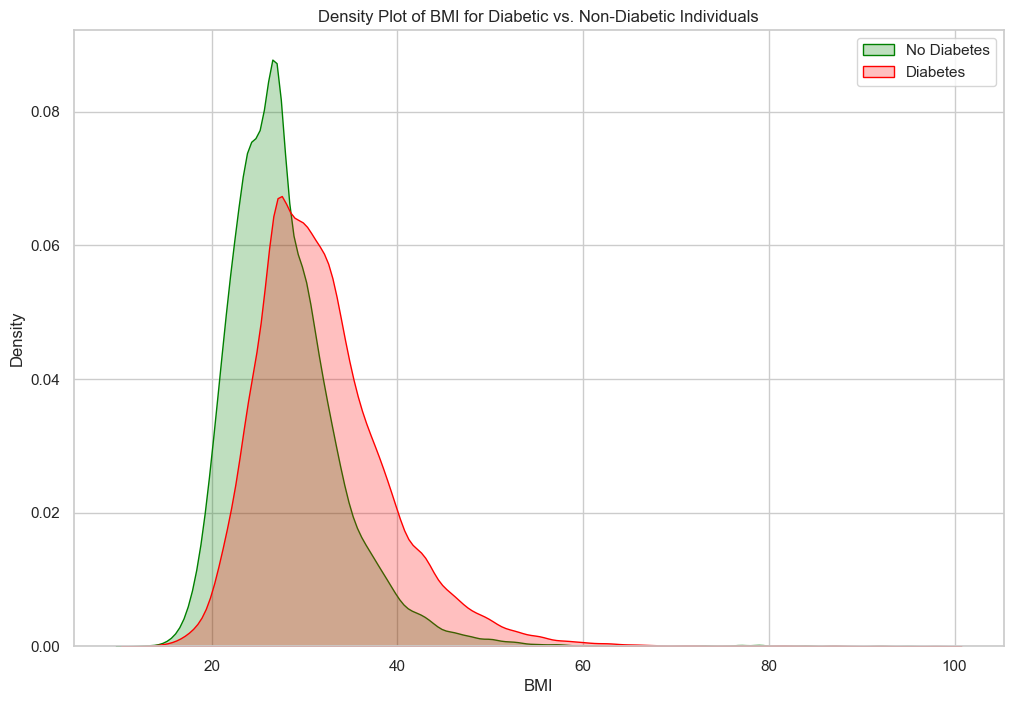

In [16]:
dataset['BMI'] = dataset['BMI'].astype(float)

plt.figure(figsize=(12, 8))
sns.kdeplot(dataset[dataset['Diabetes']==0]['BMI'],color='green',label='No Diabetes',fill=True)
sns.kdeplot(dataset[dataset['Diabetes'] == 1]['BMI'],color='red',label='Diabetes',fill=True)
plt.title('Density Plot of BMI for Diabetic vs. Non-Diabetic Individuals')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\srija\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


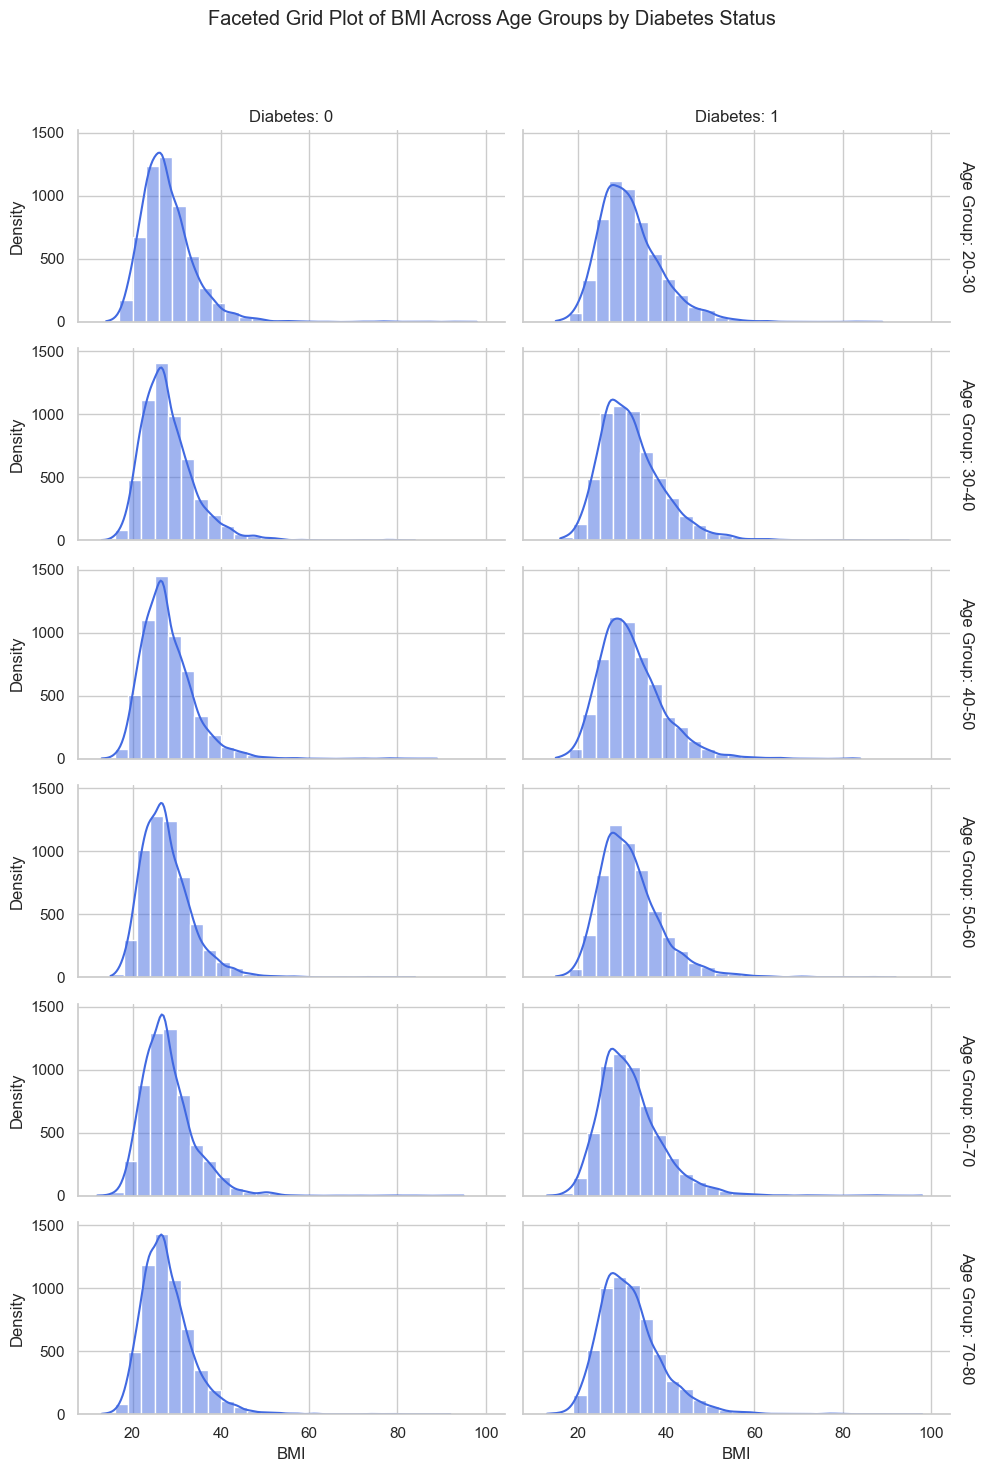

In [17]:
dataset['Age Group'] = pd.cut(dataset['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30','30-40','40-50','50-60','60-70', '70-80'])

g = sns.FacetGrid(dataset, col="Diabetes",row="Age Group",margin_titles=True, height=2.5,aspect=2)
g.map_dataframe(sns.histplot, "BMI", kde=True,color='royalblue',binwidth=3)
g.set_axis_labels("BMI", "Density")
g.set_titles(col_template="Diabetes: {col_name}", row_template="Age Group: {row_name}")
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Faceted Grid Plot of BMI Across Age Groups by Diabetes Status')
plt.show()

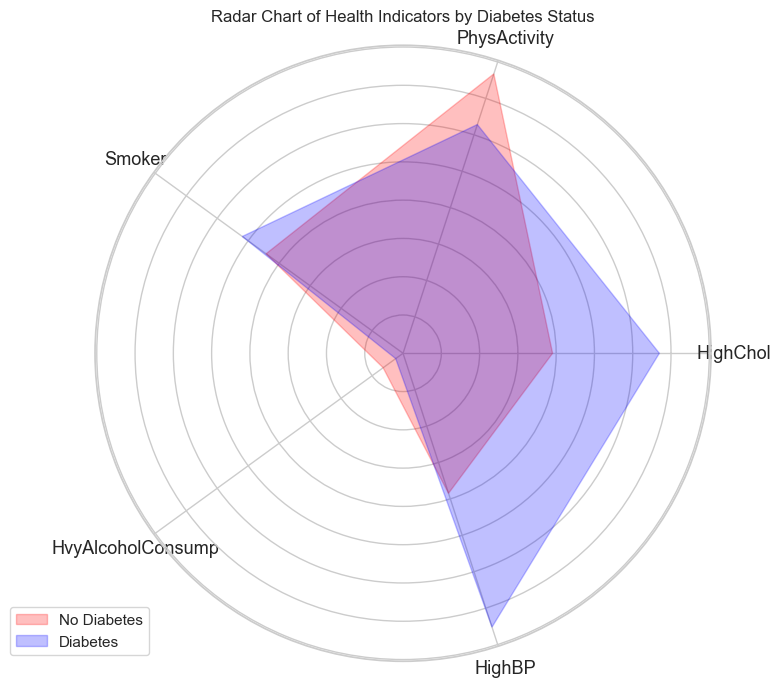

In [18]:
from math import pi
categories=['HighChol','PhysActivity','Smoker','HvyAlcoholConsump','HighBP']
means_no_diabetes=dataset[dataset['Diabetes']==0][categories].mean()
means_diabetes=dataset[dataset['Diabetes']==1][categories].mean()
num_vars=len(categories)
angles=np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
means_no_diabetes =pd.concat([means_no_diabetes,means_no_diabetes[:1]])
means_diabetes= pd.concat([means_diabetes, means_diabetes[:1]])
angles+=angles[:1]

fig, ax=plt.subplots(figsize=(8, 8),subplot_kw=dict(polar=True))
ax.fill(angles, means_no_diabetes,color='red',alpha=0.25)
ax.fill(angles,means_diabetes,color='blue',alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories,fontsize=13)

plt.legend(['No Diabetes','Diabetes'],loc='upper right',bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of Health Indicators by Diabetes Status')
plt.show()

In [19]:
import plotly.graph_objects as go
phys_act_smoker = dataset.groupby(['PhysActivity', 'Smoker', 'Diabetes']).size().reset_index(name='Count')
source, target, value = [], [], []
label = ['Phys. Active: No','Phys. Active: Yes','Smoker: No','Smoker: Yes','Diabetes: No','Diabetes: Yes']

for i, row in phys_act_smoker.iterrows():
    source.append(row['PhysActivity'])  
    target.append(row['Smoker']+2)  
    value.append(row['Count'])
    source.append(row['Smoker']+2)  
    target.append(row['Diabetes']+4) 
    value.append(row['Count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black",width=0.5),
        label=label
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram: Physical Activity, Smoking Status to Diabetes", font_size=10)
fig.show()

In [20]:
import plotly.express as px

treemap_data = dataset.groupby(['GenHlth', 'Diabetes']).size().reset_index(name='Count')
treemap_data['Diabetes'] = treemap_data['Diabetes'].apply(lambda x: 'Diabetes' if x == 1 else 'No Diabetes')
treemap_data['GenHlth'] = treemap_data['GenHlth'].map({1:'Excellent',2:'Very Good',3:'Good', 4:'Fair', 5:'Poor'})
fig = px.treemap(treemap_data, path=['GenHlth','Diabetes'],values='Count',color='GenHlth',title='Treemap of General Health Status by Diabetes Condition')

fig.update_layout(margin=dict(t=50,l=25,r=25,b=25))
fig.show()

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

In [22]:
dataset

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       44    1         0          1  26.0       0                     0   
1       31    1         1          1  26.0       1                     0   
2       31    1         0          1  26.0       0                     0   
3       47    1         1          1  28.0       1                     0   
4       71    0         0          1  29.0       1                     0   
...    ...  ...       ...        ...   ...     ...                   ...   
70687   55    0         1          1  37.0       0                     0   
70688   53    1         1          1  29.0       1                     1   
70689   48    0         1          1  25.0       0                     1   
70690   32    0         1          1  18.0       0                     0   
70691   45    0         1          1  25.0       0                     1   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0                 1       0        1                  0        3         5   
1                 0       1        0                  0        3         0   
2                 1       1        1                  0        1         0   
3                 1       1        1                  0        3         0   
4                 1       1        1                  0        2         0   
...             ...     ...      ...                ...      ...       ...   
70687             0       0        1                  0        4         0   
70688             0       1        1                  0        2         0   
70689             0       1        0                  0        5        15   
70690             0       0        0                  0        4         0   
70691             1       1        0                  0        2         0   

       PhysHlth  DiffWalk  Stroke  HighBP  Diabetes Age Group  
0            30         0       0       1         0     40-50  
1             0         0       1       1         0     30-40  
2            10         0       0       0         0     30-40  
3             3         0       0       1         0     40-50  
4             0         0       0       0         0     70-80  
...         ...       ...     ...     ...       ...       ...  
70687         0         0       0       0         1     50-60  
70688         0         1       0       0         1     50-60  
70689         0         1       0       1         1     40-50  
70690         0         1       0       1         1     30-40  
70691         0         0       0       1         1     40-50  

[69048 rows x 19 columns]

In [23]:
column_types = dataset.dtypes
print(column_types)

Age                        int64
Sex                        int64
HighChol                   int64
CholCheck                  int64
BMI                      float64
Smoker                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
GenHlth                    int64
MentHlth                   int64
PhysHlth                   int64
DiffWalk                   int64
Stroke                     int64
HighBP                     int64
Diabetes                   int64
Age Group               category
dtype: object


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
X=dataset.drop('Diabetes',axis=1)
X=X.drop(["Age Group"],axis =1)
y=dataset['Diabetes']

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features=X.select_dtypes(include=['object', 'category']).columns
numeric_transformer=SimpleImputer(strategy='mean')
categorical_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor=ColumnTransformer(
    transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])

clf = Pipeline(steps=[('preprocessor',preprocessor),('classifier',GaussianNB())])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [25]:
print("NaNs in X_train:",X_train.isna().sum())
print("NaNs in X_test:",X_test.isna().sum())

NaNs in X_train: Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64
NaNs in X_test: Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64


Naive Bayes score: 0.7125271542360608
Accuracy: 0.7125271542360608
F1 Score: 0.7125584075871463
Precision: 0.723
Recall: 0.708

Confusion Matrix:


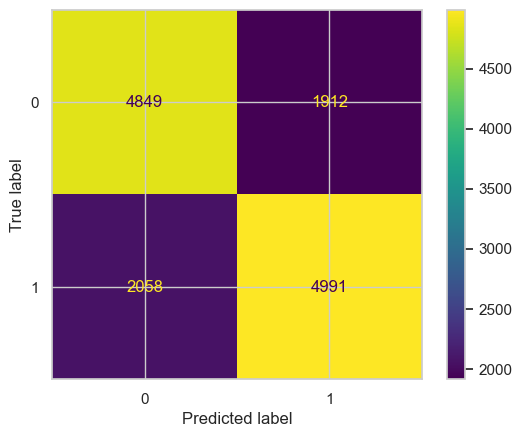

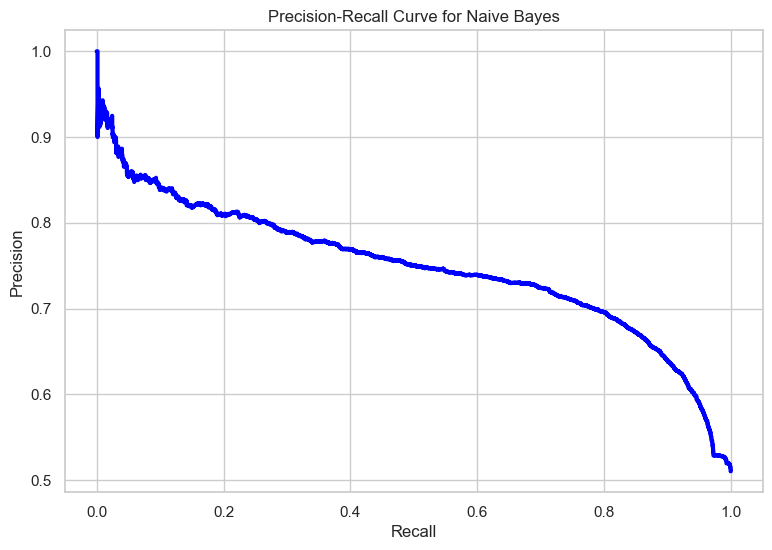

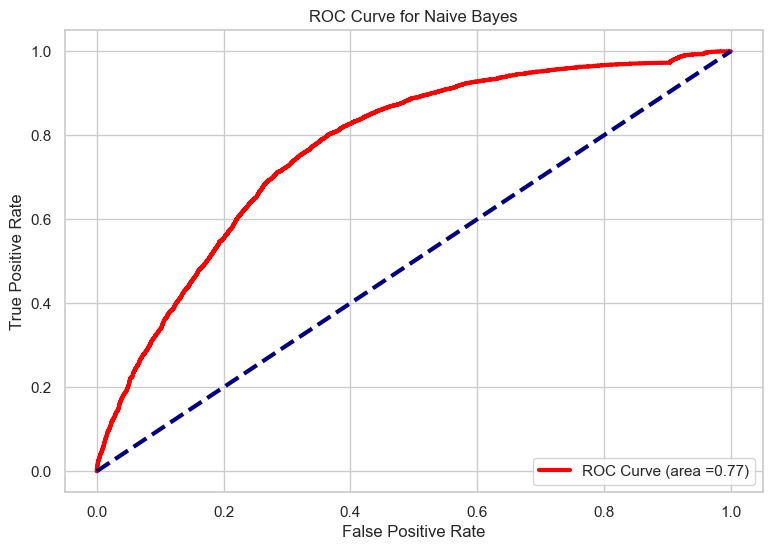

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

def precision_recall_curve_graph(y_test, y_scores, model_name):
    precision, recall, _=precision_recall_curve(y_test,y_scores)
    plt.figure(figsize=(9,6))
    plt.plot(recall, precision,color='blue',lw=3)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.show()

def roc_graph(y_test, y_scores, model_name):
    fpr,tpr,thresholds=roc_curve(y_test,y_scores)
    roc_auc=roc_auc_score(y_test,y_scores)
    plt.figure(figsize=(9, 6))
    plt.plot(fpr, tpr, color='red',lw=3,label=f'ROC Curve (area ={roc_auc:.2f})')
    plt.plot([0, 1],[0, 1],color='navy',lw=3,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def confusion_matrix_display(y_test, y_pred):
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1])
    disp.plot()
    plt.show()

def GaussianNB_Implementation(x_train,x_test,y_train,y_test):
    nb=GaussianNB()
    nb.fit(x_train, y_train)
    y_pred=nb.predict(x_test)
    y_scores=nb.predict_proba(x_test)[:, 1] 

    print("Naive Bayes score:",nb.score(x_test, y_test))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("F1 Score:",f1_score(y_test, y_pred, average="weighted"))
    print('Precision: %.3f' %precision_score(y_test, y_pred, average='binary'))
    print('Recall: %.3f' %recall_score(y_test, y_pred, average='binary'))
    print('\nConfusion Matrix:')
    confusion_matrix_display(y_test,y_pred)
    precision_recall_curve_graph(y_test, y_scores,'Naive Bayes')
    roc_graph(y_test,y_scores,'Naive Bayes')

GaussianNB_Implementation(X_train, X_test, y_train, y_test)
# X_train.dtypes

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')
Accuracy: 0.735
Precision: 0.735
Recall: 0.754

Confusion Matrix: 



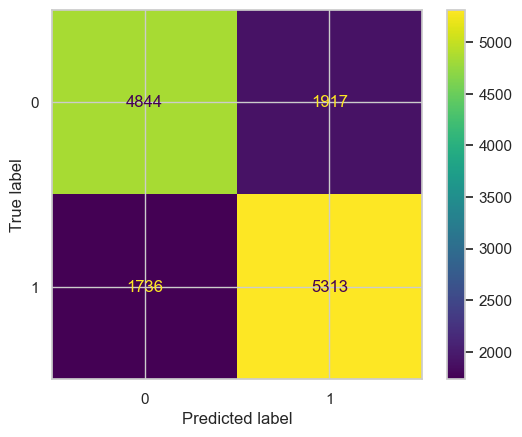

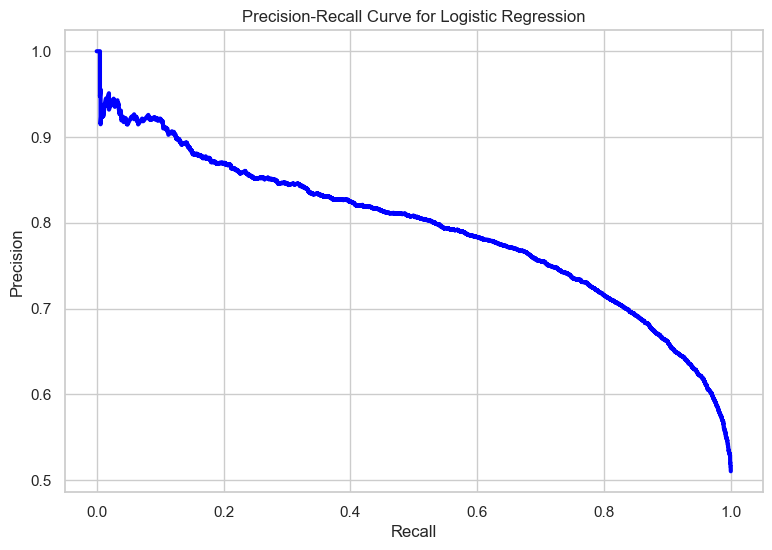

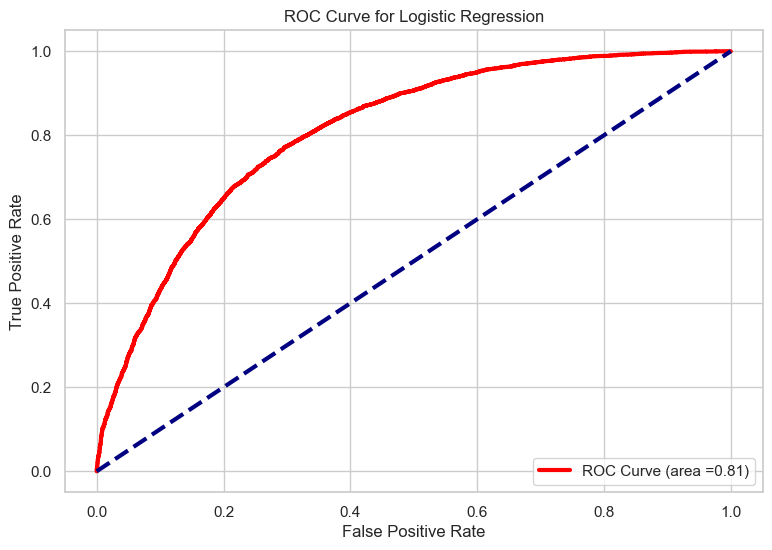

In [27]:
def LogisticRegression_Implementation(model, x_train, x_test, y_train, y_test):
    # Fit the model using the training data
    model.fit(x_train, y_train)
    
    # Predict using the fitted model
    y_pred = model.predict(x_test)
    y_scores = model.predict_proba(x_test)[:, 1]  # Get probability scores for ROC and precision-recall

    # Output the model performance metrics
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('Precision: %.3f' % precision_score(y_test, y_pred, average='binary'))
    print('Recall: %.3f' % recall_score(y_test, y_pred, average='binary'))
    print('\nConfusion Matrix: \n')
    confusion_matrix_display(y_test, y_pred)
    precision_recall_curve_graph(y_test, y_scores, 'Logistic Regression')
    roc_graph(y_test, y_scores, 'Logistic Regression')

# Example instantiation and use:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV object
logreg = LogisticRegression(max_iter=1000, solver='liblinear')  # solver compatible with L1 penalty
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
bestlogreg = grid_search.best_estimator_

# Use the best estimator found by GridSearchCV
print(bestlogreg)
LogisticRegression_Implementation(bestlogreg, X_train, X_test, y_train, y_test)

C:\Users\srija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.p

Accuracy: 0.691
Precision: 0.687
Recall: 0.725

Confusion Matrix:



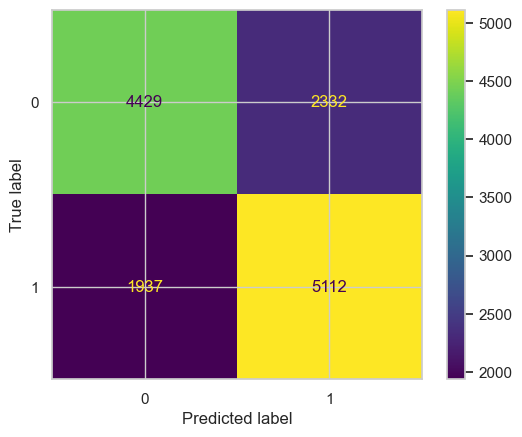

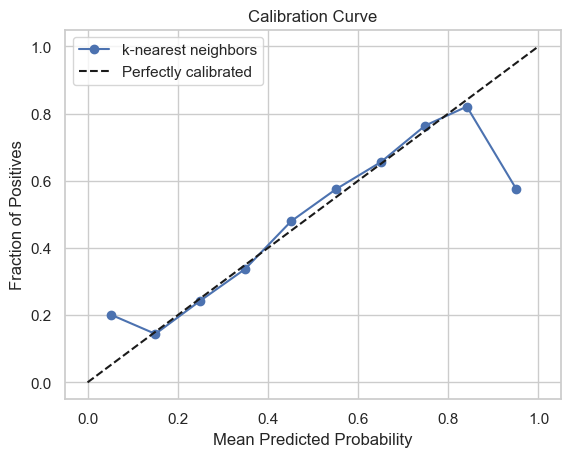

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.calibration import calibration_curve
def calibration_curve_implementation(y_test,y_scores,model_name):
    prob_true, prob_pred=calibration_curve(y_test,y_scores,n_bins=10)
    plt.plot(prob_pred,prob_true,marker='o',linestyle='-',label=model_name)
    plt.plot([0,1],[0,1],'k--',label="Perfectly calibrated")
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

def Optimum_k_RandomizedSearch(x_train, y_train):
    param_dist={'n_neighbors': list(range(1,31)),'weights':['uniform','distance']}
    knn=KNeighborsClassifier()
    rand_search=RandomizedSearchCV(knn,param_dist,n_iter=20,cv=5,scoring='accuracy',random_state=42)
    rand_search.fit(x_train,y_train)
    return rand_search.best_estimator_

def KNeighborsClassifier_Implementation(x_train,x_test,y_train,y_test):
    best_knn=Optimum_k_RandomizedSearch(x_train,y_train)
    y_pred=best_knn.predict(x_test)
    y_scores=best_knn.predict_proba(x_test)[:,1] 

    print('Accuracy: %.3f'% accuracy_score(y_test, y_pred))
    print('Precision: %.3f'% precision_score(y_test, y_pred, average='binary'))
    print('Recall: %.3f'% recall_score(y_test, y_pred, average='binary'))
    print('\nConfusion Matrix:\n')
    confusion_matrix_display(y_test,y_pred)
    calibration_curve_implementation(y_test,y_scores,'k-nearest neighbors')
    
KNeighborsClassifier_Implementation(X_train,X_test,y_train,y_test)

Best Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=12, random_state=42)
Training Accuracy: 0.7364857525616424
Test Accuracy: 0.7322230267921795
Precision: 0.730
Recall: 0.755

Confusion Matrix:


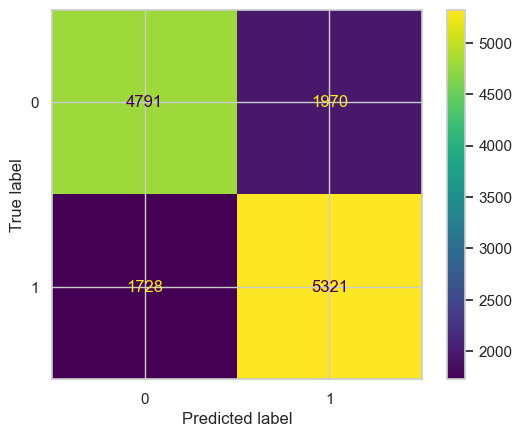

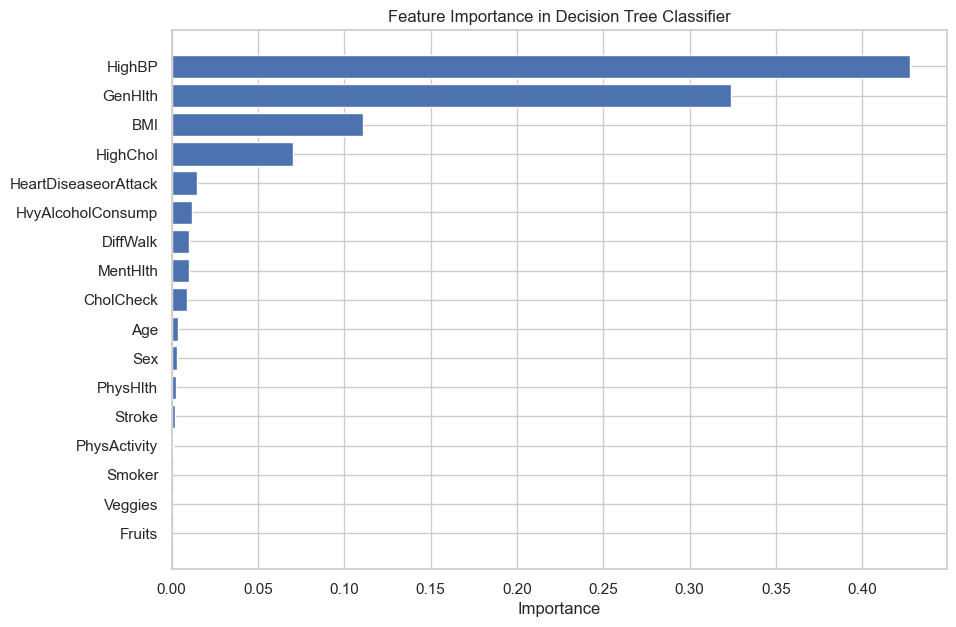

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
import numpy as np
import matplotlib.pyplot as plt
def feature_importance_plot(model,df,model_name):
    feature_importances=model.feature_importances_
    sorted_indices=np.argsort(feature_importances)
    plt.figure(figsize=(10,7))
    plt.barh(range(len(sorted_indices)),feature_importances[sorted_indices],align='center')
    plt.yticks(range(len(sorted_indices)),df.columns[sorted_indices])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance in {model_name}')
    plt.show()
    
def DecisionTreeClassifier_Implementation(best_dt, x_train, x_test, y_train, y_test):
    DTC=best_dt
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    y_scores=DTC.predict_proba(x_test)[:,1] 
    print("Training Accuracy:",DTC.score(x_train,y_train))
    print("Test Accuracy:",DTC.score(x_test,y_test))
    print("Precision: %.3f"% precision_score(y_test,y_pred,average='binary'))
    print("Recall: %.3f"% recall_score(y_test,y_pred, average='binary'))
    print('\nConfusion Matrix:')
    confusion_matrix_display(y_test,y_pred)
    feature_importance_plot(DTC,x_train,'Decision Tree Classifier')

parameters = {'criterion':['gini','entropy'],'max_depth': range(3,20),'min_samples_split':range(2, 20),
    'min_samples_leaf':range(1,10)}

dt=DecisionTreeClassifier(random_state=42)
random_search=RandomizedSearchCV(dt,parameters,n_iter=100,cv=5,scoring='accuracy',random_state=42)
random_search.fit(X_train,y_train)

best_dt = random_search.best_estimator_
print("Best Decision Tree:",best_dt)
DecisionTreeClassifier_Implementation(best_dt,X_train,X_test,y_train,y_test)

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [31]:
param_grid = {
    'n_estimators':np.arange(100,1001,100),  
    'max_features':['auto', 'sqrt','log2'],   
    'max_depth':np.arange(10,101, 10),        
    'min_samples_split':[2, 5,10],            
    'min_samples_leaf':[1,2,4],              
    'bootstrap':[True, False]                 
}

In [32]:
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\srija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


8 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\srija\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\srija\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, verbose=2)

Best Random Forest Model Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Model Performance
Accuracy=0.73
Precision=0.72
Recall=0.77


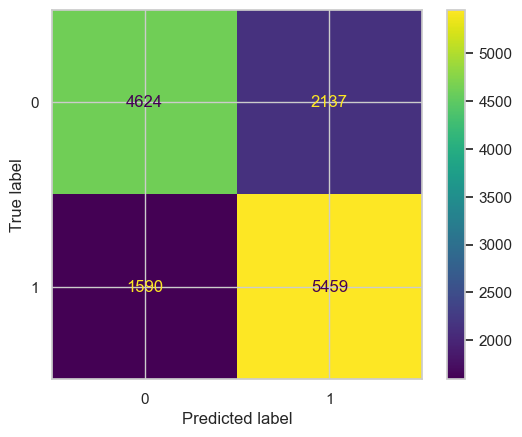

In [33]:
def evaluate_model(model,X_test,y_test):
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='binary')
    recall=recall_score(y_test,y_pred,average='binary')
    
    print(f'Model Performance')
    print(f'Accuracy={accuracy:.2f}')
    print(f'Precision={precision:.2f}')
    print(f'Recall={recall:.2f}')
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    return accuracy
best_rf=rf_random.best_estimator_
print("Best Random Forest Model Parameters:",rf_random.best_params_)
model_accuracy=evaluate_model(best_rf,X_test,y_test)

In [34]:
from sklearn.ensemble import VotingClassifier
voting_classifier_hard = VotingClassifier(
    estimators=[('Logistic_Regression', bestlogreg),('Random_Forest', best_rf),('Decision_Tree', best_dt)], 
    voting='hard')

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

voting_classifier_hard.fit(X_train, y_train)
y_pred=voting_classifier_hard.predict(X_test)
accuracy_vc=accuracy_score(y_test,y_pred)
precision_vc=precision_score(y_test,y_pred,average='binary')
recall_vc=recall_score(y_test,y_pred,average='binary')
print("Accuracy of the Voting Classifier (Hard Voting):{:.2f}%".format(accuracy_vc * 100))
print('Precision: %.3f'% precision_vc)
print('Recall: %.3f'% recall_vc)

Accuracy of the Voting Classifier (Hard Voting):73.79%
Precision: 0.733
Recall: 0.766


In [36]:
import pickle
with open('log_reg.pkl','wb') as file:
    pickle.dump(bestlogreg,file)
with open('decision_tree.pkl','wb') as file:
    pickle.dump(best_dt, file)
with open('random_forest.pkl','wb') as file:
    pickle.dump(best_rf,file)
with open('voting_classifier.pkl','wb') as file:
    pickle.dump(voting_classifier_hard,file)